In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv("post2015_master_set.csv")

In [3]:
df.shape

(26824, 22)

In [4]:
df

,Unnamed: 0,Home_Team,Away_Team,Result,Link,Season,Round,League,reduced_link,Date_New,...,Home_Red,Away_Yellow,Away_Red,Categorical Result,home_EOL,away_EOL,home_win,away_win,draw,Error
0,0,Watford,Middlesbrough,1-0,https://www.besoccer.com/match/watford-fc/midd...,2021,1,championship,/match/watford-fc/middlesbrough-fc/2021,"Friday, 11 September 2020, 20:45",...,0.0,0.0,0.0,Home Win,65,60,57.8%,17.1%,25%,NaN
1,1,Birmingham City,Brentford,1-0,https://www.besoccer.com/match/birmingham-city...,2021,1,championship,/match/birmingham-city-fc/brentford/2021,"Saturday, 12 September 2020, 13:30",...,0.0,1.0,0.0,Home Win,52,59,32.7%,43.6%,23.8%,NaN
2,2,Wycombe Wanderers,Rotherham United,0-1,https://www.besoccer.com/match/wycombe-wandere...,2021,1,championship,/match/wycombe-wanderers/rotherham-united/2021,"Saturday, 12 September 2020, 13:30",...,0.0,1.0,0.0,Away Win,41,48,29.9%,48.5%,21.6%,NaN
3,3,AFC Bournemouth,Blackburn Rovers,3-2,https://www.besoccer.com/match/afc-bournemouth...,2021,1,championship,/match/afc-bournemouth/blackburn-rovers-fc/2021,"Saturday, 12 September 2020, 16:00",...,0.0,0.0,0.0,Home Win,63,57,43.7%,32.7%,23.6%,NaN
4,4,Barnsley,Luton Town,0-1,https://www.besoccer.com/match/barnsley-fc/lut...,2021,1,championship,/match/barnsley-fc/luton-town-fc/2021,"Saturday, 12 September 2020, 16:00",...,0.0,3.0,0.0,Away Win,47,50,47.1%,26.5%,26.4%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26819,26820,Pisa,Vicenza,2-2,https://www.besoccer.com/match/pisa-calcio/vic...,2021,25,serie_b,/match/pisa-calcio/vicenza-calcio/2021,"Saturday, 27 February 2021, 14:00",...,0.0,1.0,0.0,Draw,55,48,31.8%,43.6%,24.6%,NaN
26820,26821,Pescara,Lecce,1-1,https://www.besoccer.com/match/pescara-calcio/...,2021,25,serie_b,/match/pescara-calcio/lecce/2021,"Saturday, 27 February 2021, 14:00",...,0.0,1.0,0.0,Draw,58,59,21.4%,52.9%,25.7%,NaN
26821,26822,SPAL,Reggina,1-4,https://www.besoccer.com/match/spal-1907/reggi...,2021,25,serie_b,/match/spal-1907/reggina/2021,"Saturday, 27 February 2021, 14:00",...,1.0,4.0,0.0,Away Win,60,39,60.9%,18.3%,20.8%,NaN
26822,26823,AC Monza,Cittadella,0-0,https://www.besoccer.com/match/ac-monza-brianz...,2021,25,serie_b,/match/ac-monza-brianza-1912/as-cittadella/2021,"Saturday, 27 February 2021, 16:00",...,0.0,4.0,0.0,Draw,51,58,38.5%,38.2%,23.3%,NaN


In [5]:
champ = df[df['League']=='championship']

In [6]:
champ

,Unnamed: 0,Home_Team,Away_Team,Result,Link,Season,Round,League,reduced_link,Date_New,...,Home_Red,Away_Yellow,Away_Red,Categorical Result,home_EOL,away_EOL,home_win,away_win,draw,Error
0,0,Watford,Middlesbrough,1-0,https://www.besoccer.com/match/watford-fc/midd...,2021,1,championship,/match/watford-fc/middlesbrough-fc/2021,"Friday, 11 September 2020, 20:45",...,0.0,0.0,0.0,Home Win,65,60,57.8%,17.1%,25%,NaN
1,1,Birmingham City,Brentford,1-0,https://www.besoccer.com/match/birmingham-city...,2021,1,championship,/match/birmingham-city-fc/brentford/2021,"Saturday, 12 September 2020, 13:30",...,0.0,1.0,0.0,Home Win,52,59,32.7%,43.6%,23.8%,NaN
2,2,Wycombe Wanderers,Rotherham United,0-1,https://www.besoccer.com/match/wycombe-wandere...,2021,1,championship,/match/wycombe-wanderers/rotherham-united/2021,"Saturday, 12 September 2020, 13:30",...,0.0,1.0,0.0,Away Win,41,48,29.9%,48.5%,21.6%,NaN
3,3,AFC Bournemouth,Blackburn Rovers,3-2,https://www.besoccer.com/match/afc-bournemouth...,2021,1,championship,/match/afc-bournemouth/blackburn-rovers-fc/2021,"Saturday, 12 September 2020, 16:00",...,0.0,0.0,0.0,Home Win,63,57,43.7%,32.7%,23.6%,NaN
4,4,Barnsley,Luton Town,0-1,https://www.besoccer.com/match/barnsley-fc/lut...,2021,1,championship,/match/barnsley-fc/luton-town-fc/2021,"Saturday, 12 September 2020, 16:00",...,0.0,3.0,0.0,Away Win,47,50,47.1%,26.5%,26.4%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,385,Middlesbrough,Cardiff City,1-1,https://www.besoccer.com/match/middlesbrough-f...,2021,33,championship,/match/middlesbrough-fc/cardiff-city-fc/2021,"Saturday, 27 February 2021, 16:00",...,0.0,3.0,0.0,Draw,60,60,45.3%,27.9%,26.9%,NaN
386,386,Preston North End,Huddersfield Town,3-0,https://www.besoccer.com/match/preston-north-e...,2021,33,championship,/match/preston-north-end/huddersfield-town-fc/...,"Saturday, 27 February 2021, 16:00",...,0.0,3.0,0.0,Home Win,60,57,34.5%,29.2%,36.3%,NaN
387,387,Rotherham United,Reading,0-1,https://www.besoccer.com/match/rotherham-unite...,2021,33,championship,/match/rotherham-united/reading-fc/2021,"Saturday, 27 February 2021, 16:00",...,0.0,0.0,0.0,Away Win,45,56,38.2%,37.1%,24.7%,NaN
388,388,Swansea City,Bristol City,1-3,https://www.besoccer.com/match/swansea-city-af...,2021,33,championship,/match/swansea-city-afc/bristol-city-fc/2021,"Saturday, 27 February 2021, 16:00",...,0.0,2.0,0.0,Away Win,70,60,47.9%,25.9%,26.2%,NaN


In [7]:
champ2021 = champ[df['Season']==2021]

/tmp/ipykernel_20926/4083729722.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  champ2021 = champ[df['Season']==2021]


In [8]:
champ2021

,Unnamed: 0,Home_Team,Away_Team,Result,Link,Season,Round,League,reduced_link,Date_New,...,Home_Red,Away_Yellow,Away_Red,Categorical Result,home_EOL,away_EOL,home_win,away_win,draw,Error
0,0,Watford,Middlesbrough,1-0,https://www.besoccer.com/match/watford-fc/midd...,2021,1,championship,/match/watford-fc/middlesbrough-fc/2021,"Friday, 11 September 2020, 20:45",...,0.0,0.0,0.0,Home Win,65,60,57.8%,17.1%,25%,NaN
1,1,Birmingham City,Brentford,1-0,https://www.besoccer.com/match/birmingham-city...,2021,1,championship,/match/birmingham-city-fc/brentford/2021,"Saturday, 12 September 2020, 13:30",...,0.0,1.0,0.0,Home Win,52,59,32.7%,43.6%,23.8%,NaN
2,2,Wycombe Wanderers,Rotherham United,0-1,https://www.besoccer.com/match/wycombe-wandere...,2021,1,championship,/match/wycombe-wanderers/rotherham-united/2021,"Saturday, 12 September 2020, 13:30",...,0.0,1.0,0.0,Away Win,41,48,29.9%,48.5%,21.6%,NaN
3,3,AFC Bournemouth,Blackburn Rovers,3-2,https://www.besoccer.com/match/afc-bournemouth...,2021,1,championship,/match/afc-bournemouth/blackburn-rovers-fc/2021,"Saturday, 12 September 2020, 16:00",...,0.0,0.0,0.0,Home Win,63,57,43.7%,32.7%,23.6%,NaN
4,4,Barnsley,Luton Town,0-1,https://www.besoccer.com/match/barnsley-fc/lut...,2021,1,championship,/match/barnsley-fc/luton-town-fc/2021,"Saturday, 12 September 2020, 16:00",...,0.0,3.0,0.0,Away Win,47,50,47.1%,26.5%,26.4%,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,385,Middlesbrough,Cardiff City,1-1,https://www.besoccer.com/match/middlesbrough-f...,2021,33,championship,/match/middlesbrough-fc/cardiff-city-fc/2021,"Saturday, 27 February 2021, 16:00",...,0.0,3.0,0.0,Draw,60,60,45.3%,27.9%,26.9%,NaN
386,386,Preston North End,Huddersfield Town,3-0,https://www.besoccer.com/match/preston-north-e...,2021,33,championship,/match/preston-north-end/huddersfield-town-fc/...,"Saturday, 27 February 2021, 16:00",...,0.0,3.0,0.0,Home Win,60,57,34.5%,29.2%,36.3%,NaN
387,387,Rotherham United,Reading,0-1,https://www.besoccer.com/match/rotherham-unite...,2021,33,championship,/match/rotherham-united/reading-fc/2021,"Saturday, 27 February 2021, 16:00",...,0.0,0.0,0.0,Away Win,45,56,38.2%,37.1%,24.7%,NaN
388,388,Swansea City,Bristol City,1-3,https://www.besoccer.com/match/swansea-city-af...,2021,33,championship,/match/swansea-city-afc/bristol-city-fc/2021,"Saturday, 27 February 2021, 16:00",...,0.0,2.0,0.0,Away Win,70,60,47.9%,25.9%,26.2%,NaN


In [9]:
def eval_result(result:str):
    result_list = result.split("-")
    try:
        return int(result_list[0])-int(result_list[1])
    except:
        return "Unknown"

In [10]:
differenceList = []
for index, row in champ2021.iterrows():
    result = row['Result']
    difference=eval_result(result=result)
    differenceList.append(difference)

In [11]:
champ2021['difference'] = differenceList

In [12]:
def EolBenchmark(categorial_result, home_win, away_win, draw):
    if categorial_result.strip() == 'Home Win':
        if home_win > away_win and home_win > draw:
            EolPredict=1
        else:
            EolPredict=0
    elif categorial_result.strip() == 'Away win':
        if away_win > home_win and away_win > draw:
            EolPredict=1
        else:
            EolPredict=0
    elif categorial_result.strip() == 'Draw':
        if draw > home_win and draw > away_win:
            EolPredict=1
        else:
            EolPredict=0
    else:
        EolPredict=0
#     print(EolPredict)
    return EolPredict
    
            
    

In [13]:
EolPrecdicCounter = 0
amount = 0
for index, row in champ2021.iterrows():
    amount +=1
    catrgorial = row['Categorical Result']
    home = row['home_win']
    away = row['away_win']
    draw = row['draw']
    benchmark = EolBenchmark(categorial_result= catrgorial, home_win= home, away_win= away, draw= draw)
    EolPrecdicCounter += benchmark

print("%",(EolPrecdicCounter/amount)*100)

% 29.743589743589745


The Above cell should be the bench mark we try and beat

In [14]:
features = list(champ2021.columns)

In [15]:
print(features)

['Unnamed: 0', 'Home_Team', 'Away_Team', 'Result', 'Link', 'Season', 'Round', 'League', 'reduced_link', 'Date_New', 'Referee', 'Home_Yellow', 'Home_Red', 'Away_Yellow', 'Away_Red', 'Categorical Result', 'home_EOL', 'away_EOL', 'home_win', 'away_win', 'draw', 'Error', 'difference']


In [16]:
df = pd.DataFrame(champ2021, columns = features)

In [17]:
df.head()

,Unnamed: 0,Home_Team,Away_Team,Result,Link,Season,Round,League,reduced_link,Date_New,...,Away_Yellow,Away_Red,Categorical Result,home_EOL,away_EOL,home_win,away_win,draw,Error,difference
0,0,Watford,Middlesbrough,1-0,https://www.besoccer.com/match/watford-fc/midd...,2021,1,championship,/match/watford-fc/middlesbrough-fc/2021,"Friday, 11 September 2020, 20:45",...,0.0,0.0,Home Win,65,60,57.8%,17.1%,25%,NaN,1
1,1,Birmingham City,Brentford,1-0,https://www.besoccer.com/match/birmingham-city...,2021,1,championship,/match/birmingham-city-fc/brentford/2021,"Saturday, 12 September 2020, 13:30",...,1.0,0.0,Home Win,52,59,32.7%,43.6%,23.8%,NaN,1
2,2,Wycombe Wanderers,Rotherham United,0-1,https://www.besoccer.com/match/wycombe-wandere...,2021,1,championship,/match/wycombe-wanderers/rotherham-united/2021,"Saturday, 12 September 2020, 13:30",...,1.0,0.0,Away Win,41,48,29.9%,48.5%,21.6%,NaN,-1
3,3,AFC Bournemouth,Blackburn Rovers,3-2,https://www.besoccer.com/match/afc-bournemouth...,2021,1,championship,/match/afc-bournemouth/blackburn-rovers-fc/2021,"Saturday, 12 September 2020, 16:00",...,0.0,0.0,Home Win,63,57,43.7%,32.7%,23.6%,NaN,1
4,4,Barnsley,Luton Town,0-1,https://www.besoccer.com/match/barnsley-fc/lut...,2021,1,championship,/match/barnsley-fc/luton-town-fc/2021,"Saturday, 12 September 2020, 16:00",...,3.0,0.0,Away Win,47,50,47.1%,26.5%,26.4%,NaN,-1


In [18]:
home_EOL = df['home_EOL']
result = df['difference']

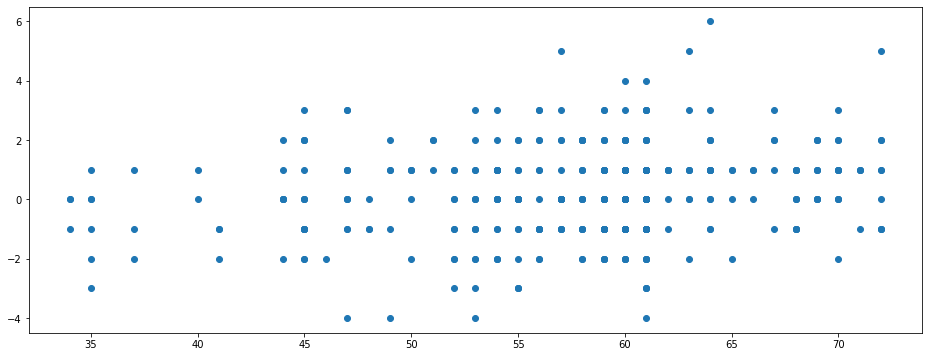

In [19]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(home_EOL,result)
plt.show()

In [20]:
x = np.array(home_EOL).reshape(-1,1)
y = np.array(result)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

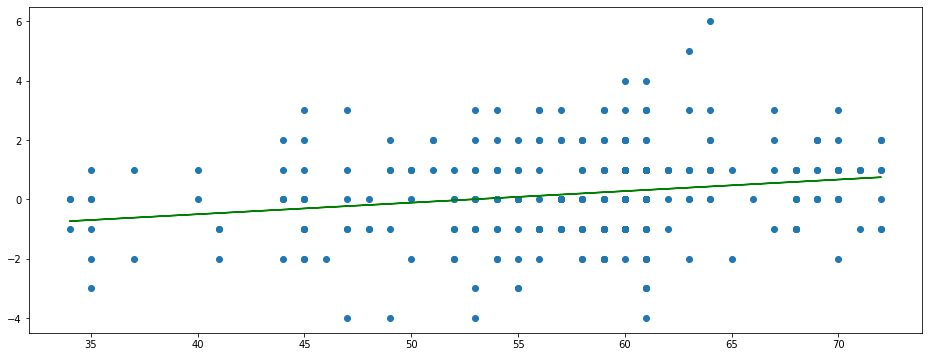

In [23]:
fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(X_train, y_train)
ax.plot(X_train, model.predict(X_train), color='green')
plt.show()

y = mx + b

In [24]:
b = model.intercept_
m = model.coef_

In [25]:
print(b)

-2.0602858057098183


In [26]:
print(m)

[0.03898876]


In [27]:
#r squred value. the closer to one the better
model.score(X_train, y_train)

0.042003738721823725

In [28]:
predictions = model.predict(X_test)
predictions

array([ 0.20106201,  0.43499454,  0.1230845 ,  0.31802828, -0.2278143 ,
        0.04510699,  0.08409574,  0.4739833 ,  0.27903952,  0.31802828,
        0.27903952,  0.51297205,  0.55196081, -0.30579181,  0.31802828,
        0.27903952,  0.31802828,  0.16207325, -0.03287052, -0.2278143 ,
        0.31802828, -0.2278143 , -0.03287052,  0.00611823,  0.16207325,
        0.04510699,  0.27903952,  0.24005077,  0.62993832,  0.74690459,
        0.24005077,  0.27903952, -0.30579181,  0.04510699,  0.43499454,
       -0.2278143 ,  0.4739833 ,  0.27903952,  0.31802828,  0.27903952,
        0.08409574,  0.31802828, -0.61770185,  0.62993832,  0.27903952,
        0.31802828,  0.27903952, -0.30579181,  0.31802828,  0.20106201,
        0.20106201,  0.43499454,  0.31802828,  0.51297205,  0.27903952,
        0.08409574,  0.27903952,  0.24005077,  0.66892708,  0.1230845 ,
        0.24005077, -0.30579181,  0.31802828, -0.34478057,  0.31802828,
        0.43499454,  0.74690459,  0.31802828,  0.24005077,  0.04

Building our own regression model

In [33]:
x = np.array(home_EOL)
y = np.array(result)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [41]:
# y = Bx + a 
#Taking linear regression equations from https://en.wikipedia.org/wiki/Simple_linear_regression
B_hat = ((X_train - X_train.mean())*(y_train - y_train.mean())).sum() / ((X_train - X_train.mean()) ** 2).sum()
a_hat = y_train.mean() - B_hat * X_train.mean()

In [42]:
a_hat

-2.0602858057098183

In [46]:
def make_predictions(X_train, X_test, y_train, y_test):
    B_hat = ((X_train - X_train.mean())*(y_train - y_train.mean())).sum() / ((X_train - X_train.mean()) ** 2).sum()
    a_hat = y_train.mean() - B_hat * X_train.mean()
    #y = Bx + a
    return B_hat * X_test + a_hat

In [47]:
make_predictions(X_train, X_test, y_train, y_test)

array([ 0.20106201,  0.43499454,  0.1230845 ,  0.31802828, -0.2278143 ,
        0.04510699,  0.08409574,  0.4739833 ,  0.27903952,  0.31802828,
        0.27903952,  0.51297205,  0.55196081, -0.30579181,  0.31802828,
        0.27903952,  0.31802828,  0.16207325, -0.03287052, -0.2278143 ,
        0.31802828, -0.2278143 , -0.03287052,  0.00611823,  0.16207325,
        0.04510699,  0.27903952,  0.24005077,  0.62993832,  0.74690459,
        0.24005077,  0.27903952, -0.30579181,  0.04510699,  0.43499454,
       -0.2278143 ,  0.4739833 ,  0.27903952,  0.31802828,  0.27903952,
        0.08409574,  0.31802828, -0.61770185,  0.62993832,  0.27903952,
        0.31802828,  0.27903952, -0.30579181,  0.31802828,  0.20106201,
        0.20106201,  0.43499454,  0.31802828,  0.51297205,  0.27903952,
        0.08409574,  0.27903952,  0.24005077,  0.66892708,  0.1230845 ,
        0.24005077, -0.30579181,  0.31802828, -0.34478057,  0.31802828,
        0.43499454,  0.74690459,  0.31802828,  0.24005077,  0.04

In [50]:
#Creating r-squared. eqatuon taken from https://en.wikipedia.org/wiki/Simple_linear_regression
numerator = (X_train * y_train).mean() - X_train.mean() * y_train.mean()
denominator = np.sqrt(((X_train**2).mean() - X_train.mean()**2)*((y_train**2).mean() - y_train.mean()**2))
rxy = numerator / denominator
r_sqaured = rxy ** 2
r_sqaured

0.0420037387218236

From AICore portal:

In [56]:
x = np.array(home_EOL).reshape(-1,1)
y = np.array(result)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [58]:
X_test, X_validation, y_test, y_validation = train_test_split(
    X_test, y_test, test_size = 0.3
)
print("Number of samples in:")
print(f"  Training: {len(y_train)}")
print(f"  Validation: {len(y_validation)}")
print(f"  Testing: {len(y_test)}")

Number of samples in:
  Training: 273
  Validation: 36
  Testing: 81


In [59]:
np.random.seed(2)

models = [
    DecisionTreeRegressor(splitter="random"),
    SVR(),
    LinearRegression()
]

for model in models:
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_validation_pred = model.predict(X_validation)
    y_test_pred = model.predict(X_test)
    
    train_loss = mean_squared_error(y_train, y_train_pred)
    validation_loss = mean_squared_error(y_validation, y_validation_pred)
    test_loss = mean_squared_error(y_test, y_test_pred)
    
    print(
        f"{model.__class__.__name__}: "
        f"Train Loss: {train_loss} | Validation Loss: {validation_loss} | "
        f"Test Loss: {test_loss}"
    
    )

DecisionTreeRegressor: Train Loss: 2.1036681877341215 | Validation Loss: 2.173819046531392 | Test Loss: 2.655184653036518
SVR: Train Loss: 2.3605465629107147 | Validation Loss: 2.453461511884595 | Test Loss: 2.095514371758683
LinearRegression: Train Loss: 2.3487682434217354 | Validation Loss: 2.4004815542851583 | Test Loss: 2.1541463110542756


In [60]:
def calculate_validation_loss(X_train, y_train, X_validation, y_validation):
    model = LinearRegression()

    # Without data leakage, train on train, validate on validation
    model.fit(X_train, y_train)
    y_validation_pred = model.predict(X_validation)
    validation_loss = mean_squared_error(y_validation, y_validation_pred)

    print(f"Validation loss: {validation_loss}")

In [61]:
    
# Without data leakage, train on train, validate on validation
calculate_validation_loss(X_train, y_train, X_validation, y_validation)

# With data leakage, 50 samples from validation added
fail_X_train = np.concatenate((X_train, X_validation[:50]))
fail_y_train = np.concatenate((y_train, y_validation[:50]))

calculate_validation_loss(fail_X_train, fail_y_train, X_validation, y_validation)

Validation loss: 2.4004815542851583
Validation loss: 2.398906004929635
